In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 20:45:27,134 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:45:27,135 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:45:27,136 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:45:27,146 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 20:45:27,148 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:45:27,175 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 20:45:27,908 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:45:27,912 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:45:27,913 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:45:27,913 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:45:27,914 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:45:27,915 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:45:27,916 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:45:27,917 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:45:28,804 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 20:45:29,341 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 20:45:29,344 - settings - Setting database.user to celiib
INFO - 2021-04-25 20:45:29,345 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 20:45:29,347 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 20:45:30,208 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 10
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136311740477, 864691135212690816, 864691135925564174,
       864691136105484249])


--- Working on Neuron 864691136311740477 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 230, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 3099, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 3329
n_valid_syn_ids_presyn = 230
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 3099
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136311740477
Postsyn counts:
TP:3090
TN:0
FP:9
FN:0
Presyn counts:
TP:12
TN:0
FP:218
FN:0


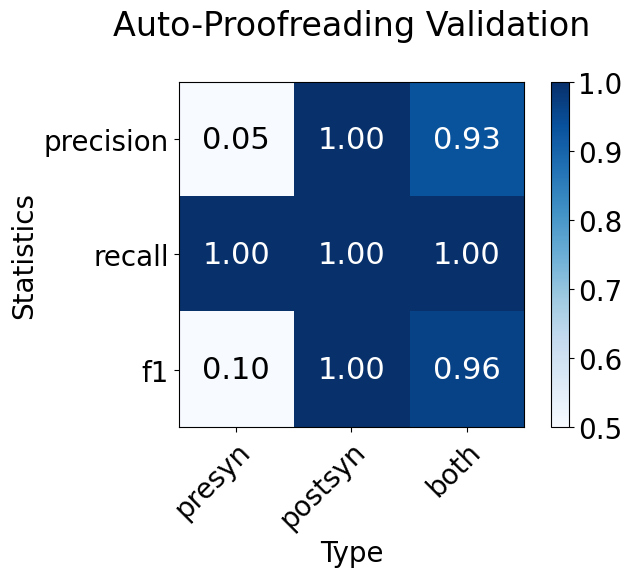

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136311740477_validation_df.pbz2
File size is 0.066758 MB
Total time for neuron 864691136311740477: 65.51803350448608

--- Working on Neuron 864691135212690816 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 47, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 2336, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 2383
n_valid_syn_ids_presyn = 47
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 2336
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135212690816
Postsyn counts:
TP:2334
TN:0
FP:2
FN:0
Presyn counts:
TP:16
TN:0
FP:31
FN:0


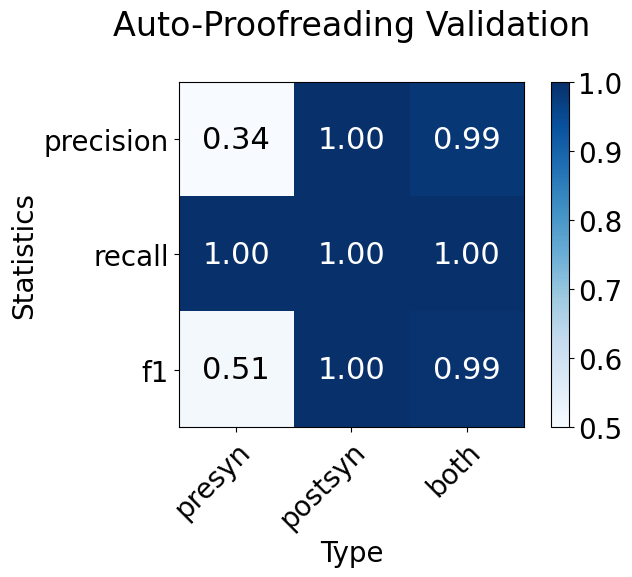

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135212690816_validation_df.pbz2
File size is 0.048338 MB
Total time for neuron 864691135212690816: 42.57582497596741

--- Working on Neuron 864691135925564174 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 104, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1604, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1708
n_valid_syn_ids_presyn = 104
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1604
n_errored_syn_ids_postsyn = 0
Segment Id = 864691135925564174
Postsyn counts:
TP:1603
TN:0
FP:1
FN:0
Presyn counts:
TP:17
TN:0
FP:87
FN:0


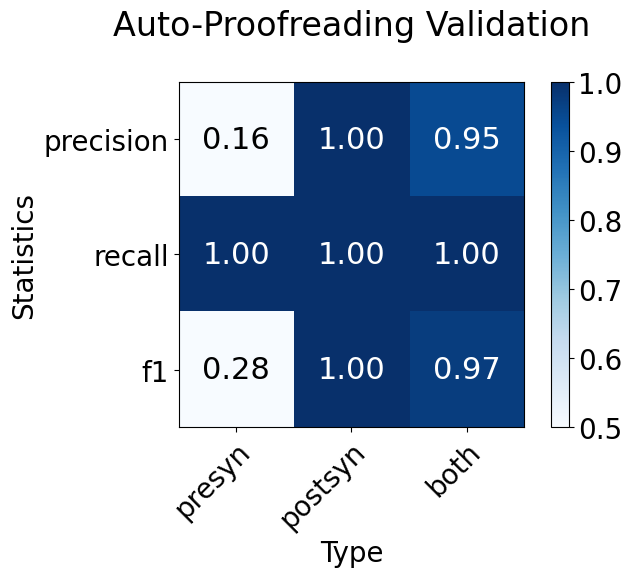

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691135925564174_validation_df.pbz2
File size is 0.035855 MB
Total time for neuron 864691135925564174: 51.27239751815796

--- Working on Neuron 864691136105484249 --
Decompressing Neuron in minimal output mode...please wait
For presyn: # valid synapses = 244, # error synapses  = 0, # error presyns = 0
For postsyn: # valid synapses = 1746, # error synapses  = 0, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1990
n_valid_syn_ids_presyn = 244
n_errored_syn_ids_presyn = 0
n_valid_syn_ids_postsyn = 1746
n_errored_syn_ids_postsyn = 0
Segment Id = 864691136105484249
Postsyn counts:
TP:1724
TN:0
FP:22
FN:0
Presyn counts:
TP:17
TN:0
FP:227
FN:0


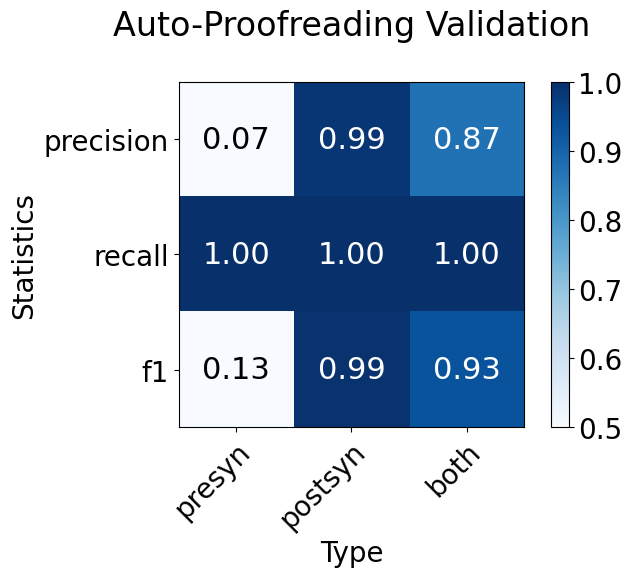

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/baseline_data/864691136105484249_validation_df.pbz2
File size is 0.040605 MB
Total time for neuron 864691136105484249: 65.2629942893982


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = [],
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False,
                                                             apply_non_axon_presyn_errors = False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./baseline_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")